## Notebook 2 : Test of supervised and unsupervised nlp alogithms

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from gensim.models import word2vec
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
import time
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import make_scorer, f1_score,accuracy_score,jaccard_score
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from joblib import dump, load

pd.set_option("display.max_rows" , 500)
pd.set_option("display.max_columns" , 500)

#load pickle file
PATH = "F:\Work\OpenClassroomML\Projet5\data"

df = pd.read_pickle(os.path.join(PATH, "cleaned_data.pkl"))

In [2]:
df

,Id,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score,Lang,htmlfree_text_title,htmlfree_text_body,htmlfree_text,tokenized_text,no_stop_words_text,lowercase_text,pos_text,lemmatized_text,Tags_cleaned,tags_common,text_lenght,tag_number
0,18392584,2013-08-22 23:54:51,Remove spacing between <p>,<p>I want to remove the spaces between paragra...,<html><css>,174868,6,11,15,en,Remove spacing between,I want to remove the spaces between paragraphs...,Remove spacing between I want to remove the s...,"[Remove, spacing, between, I, want, to, remove...","[Remove, spacing, want, remove, spaces, paragr...","[remove, spacing, want, remove, spaces, paragr...","[v, v, n, v, n, n, n, n, n, v, n, n, a, v, v, ...","[remove, space, want, remove, space, paragraph...","[html, css]","[css, html]",31,2
1,58544946,2019-10-24 15:50:31,How to set the fixed random seed in numpy?,<p>I was believing that setting a seed always ...,<python><numpy>,9239,8,2,6,en,How to set the fixed random seed in numpy?,I was believing that setting a seed always giv...,How to set the fixed random seed in numpy? I w...,"[How, to, set, the, fixed, random, seed, in, n...","[How, set, fixed, random, seed, numpy, believi...","[how, set, fixed, random, seed, numpy, believi...","[n, n, v, n, n, n, v, v, n, r, v, n, n, v, a, ...","[how, set, fix, random, seed, numpy, believe, ...","[python, numpy]",[python],32,2
2,18392729,2013-08-23 00:12:36,Writing a simple function using while,<p>A Python HOMEWORK Assignment asks me to wri...,<python>,1096,10,3,8,en,Writing a simple function using while,A Python HOMEWORK Assignment asks me to write ...,Writing a simple function using while A Python...,"[Writing, a, simple, function, using, while, A...","[Writing, simple, function, using, Python, HOM...","[writing, simple, function, using, python, hom...","[v, n, n, v, n, n, n, n, n, n, v, n, a, a, n, ...","[write, simple, function, use, python, homewor...",[python],[python],112,1
4,18392779,2013-08-23 00:19:45,Google App Engine (Python) - Uploading a file ...,<p>I want the user to be able to upload images...,<python><image><google-app-engine><upload><app...,8456,6,3,7,en,Google App Engine (Python) - Uploading a file ...,I want the user to be able to upload images to...,Google App Engine (Python) - Uploading a file ...,"[Google, App, Engine, (, Python, ), Uploading,...","[Google, App, Engine, Python, Uploading, file,...","[google, app, engine, python, uploading, file,...","[n, n, n, n, v, n, n, n, n, a, n, n, n, n, n, ...","[google, app, engine, python, upload, file, im...","[python, image, google-app-engine, upload, app...",[python],70,5
6,18393665,2013-08-23 02:23:47,Embed the PDF in a webpage without using the b...,<p>Currently I am using the standard way to em...,<php><javascript><html><pdf><pdf-viewer>,81051,7,3,11,en,Embed the PDF in a webpage without using the b...,Currently I am using the standard way to embed...,Embed the PDF in a webpage without using the b...,"[Embed, the, PDF, in, a, webpage, without, usi...","[Embed, PDF, webpage, without, using, built, P...","[embed, pdf, webpage, without, using, built, p...","[n, n, n, n, v, n, n, n, r, v, n, n, n, n, n, ...","[embed, pdf, webpage, without, use, built, pdf...","[php, javascript, html, pdf, pdf-viewer]","[html, javascript, php]",55,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19717769,2013-10-31 22:36:39,print two dimensional list,"<p>I have a list, in which is another list and...",<python><python-3.x><python-3.3>,19405,7,7,11,en,print two dimensional list,"I have a list, in which is another list and I ...","print two dimensional list I have a list, in w...","[print, two, dimensional, list, I, have, a, li...","[print, two, dimensional, list, list, another,...","[print, two, dimensional, list, list, another,...","[n, n, n, n, n, n, n, n, n, n, v, n, n, v, n, ...","[print, two, dimensional, list, list, another,...","[python, python-3.x, python-3.3]","[python, python

### Unsupervised method : LDA(latent direichlet allocation) with TF-IDF and count vectorizer

In [3]:
#TF-IDF (term frequency-inverse document frequency) and count vectorizer
cvect = CountVectorizer(stop_words='english', max_df=0.3, min_df=10)
tfidf = TfidfVectorizer(stop_words='english', max_df=0.3, min_df=10)

cv_fit = cvect.fit_transform(df["lemmatized_text"].astype("string"))
tfidf_fit = tfidf.fit_transform(df["lemmatized_text"].astype("string"))

In [4]:
def lda_custom(data,n_components):
        
    """Perform LDA fit_transform and evaluate perplexity 

    Positional arguments : 
    -----------------------------------
    data : data to fit LDA (vectorized)
    n_components : LDA's n_components
    -----------------------------------
    return lda_output,perplexity    
    """

    lda_model = LatentDirichletAllocation(
            n_components=n_components,
            random_state=42)

    lda_output = lda_model.fit_transform(data)
    perplexity = lda_model.perplexity(data)
    
    return lda_output,perplexity,lda_model

def display_topics(model, feature_names, no_top_words):
    """Display the topics of a model   
    """
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


In [5]:
#Tunning LDA
range_ = range(2, 20,1)
perplexity_list = []
for n_components in range_:
    lda_output,perplexity,lda_model = lda_custom(data = cv_fit[0:1000],n_components = n_components )
    perplexity_list.append(perplexity)


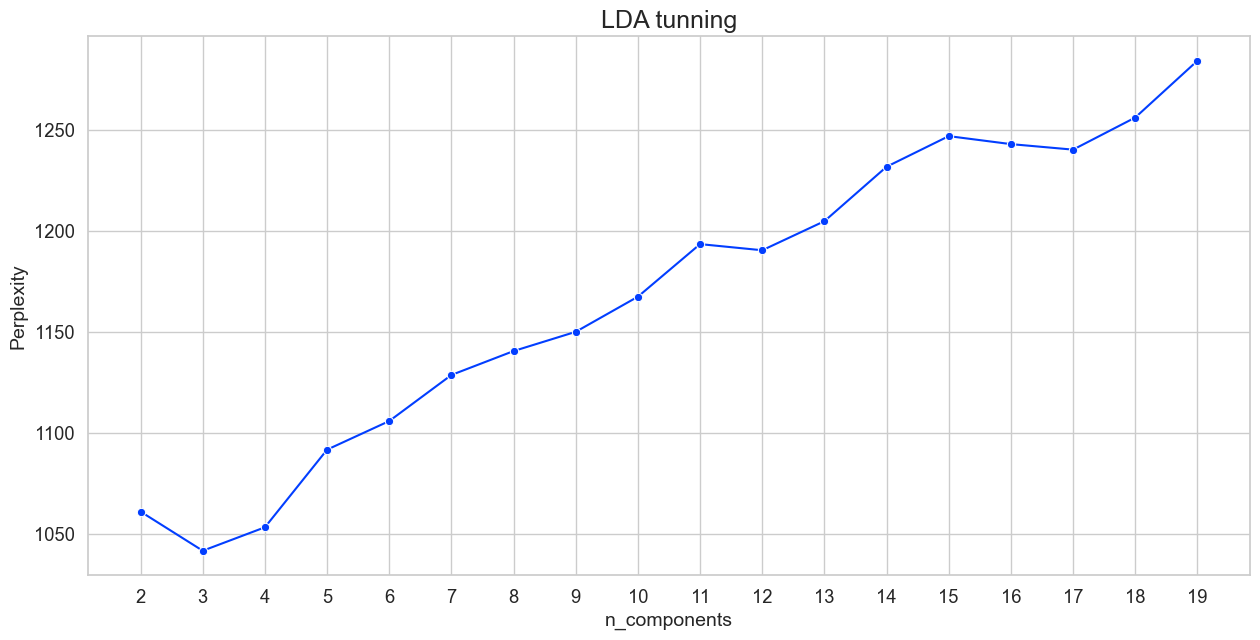

In [6]:
sns.set_theme(style = "whitegrid",
              palette = "bright",
              font_scale = 1.2)

plt.figure(figsize = (15, 7))
    
ax = sns.lineplot(x = list(range_),
                  y = perplexity_list,
                  marker = "o",
                  dashes = False)
    
ax.set_title('LDA tunning', fontsize = 18)
ax.set_xlabel('n_components', fontsize = 14)
ax.set_ylabel('Perplexity', fontsize = 14)
ax.set_xticks(list(range(1, n_components+1)))
plt.plot();

In [7]:
#Fit the model with best param
lda_output,perplexity,lda_model = lda_custom(data = cv_fit, n_components = 3 )

In [8]:
#Display the topics
no_top_words = 10
tf_feature_names = cvect.get_feature_names_out()
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
function class type object method value return way example question
Topic 1:
file string time number data way run want need table
Topic 2:
error file app problem run application android page image user


In [9]:
#NMF
n_topics = 3

nmf = NMF(n_components=n_topics,
          random_state=1,
          alpha=.1,
          l1_ratio=.5,
          init='nndsvd')

nmf.fit(tfidf_fit)
tfidf_feature_names = tfidf.get_feature_names_out()
display_topics(nmf, tfidf_feature_names, no_top_words)


F:\Users\alexh\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


Topic 0:
function array value type string object return class method way
Topic 1:
error app run android problem page application follow server user
Topic 2:
file line read python folder directory upload command path csv


Here we can see that the unsupervised model indeed return adequat topics but the credibility of the results is discutable.   

### Supervised method

Here we test superfised methods such as logistic regression and SGDClassifier in a one versus rest fashion, featured with word embeding (WordToVec, BERT and USE).

To reduce the computing time and memory stress we first perform a dimension reduction with a truncated svd (pca not being suited for sparse arrays) on our tf-idf features.

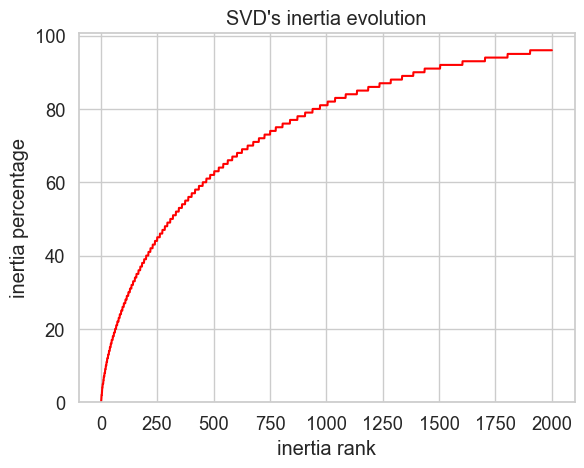

In [10]:
#TruncatedSVD on tfidf features for dimension reduction (latent semantic analysis)
n_components = 2000
svd = TruncatedSVD(n_components=n_components, n_iter=5, random_state=42)
reduced = svd.fit_transform(tfidf_fit)

scree = (svd.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red")
plt.xlabel("inertia rank")
plt.ylabel("inertia percentage")
plt.title("SVD's inertia evolution")
plt.show(block=False)

In [11]:
reduced

array([[ 1.44948279e-01,  2.89807085e-02, -4.18199586e-03, ...,
         1.04468280e-02, -3.06414482e-03,  3.18989683e-03],
       [ 9.52381071e-02,  1.47787457e-02, -1.17701956e-02, ...,
         7.47382755e-03,  3.50869118e-03,  7.92157841e-04],
       [ 2.45951842e-01,  1.71221238e-01,  9.80889982e-02, ...,
        -5.49722042e-03,  1.08296328e-02,  1.07538141e-02],
       ...,
       [ 1.10040401e-01, -2.34918207e-02,  3.43955205e-02, ...,
        -3.84499646e-03, -6.90405004e-04,  2.09508310e-03],
       [ 1.57311679e-01, -1.49778302e-01,  1.07766794e-01, ...,
        -6.16813592e-03, -5.67961905e-03,  6.43322094e-03],
       [ 1.32558403e-01,  8.16277617e-02, -7.88679326e-02, ...,
         1.21614094e-02,  2.33894159e-04,  8.86757766e-03]])

In [3]:
#Tags label multibinarisation
mlb = MultiLabelBinarizer(sparse_output = True)
y = mlb.fit_transform(df["tags_common"].apply(lambda x:  np.asarray(x)))
X = reduced

#Saving best model with joblib
PATHGit = r"C:\Users\alexh\Question_Segmentation"
dump(mlb, os.path.join(PATHGit,'binarizer.joblib'))

['C:\\Users\\alexh\\Question_Segmentation\\binarizer.joblib']

In [13]:
y.shape

(8520, 50)

In [14]:
#Splitting data
xtrain, xtest, ytrain, ytest = train_test_split(X, y.todense(),
                                                test_size=0.4)


In [15]:
def CustomGridSearchCV(model,grid,
                       xtrain,ytrain):
    """
    Return the best estimator of the model within the grid evaluating the F1 xeighted score
    """

    f1_scorer = make_scorer(f1_score, average='weighted')

    model_cv=GridSearchCV(model,grid,
                          cv=5,
                          scoring= f1_scorer,
                          n_jobs = -1)

    model_cv.fit(np.asarray(xtrain),np.asarray(ytrain))
    print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)

    return model_cv.best_estimator_

def TestModel(model,grid,
              xtrain,ytrain,
              xtest,ytest,
              modelname):
    """
    new_row,best_model,ypred =  TestModel(model,grid,
                                          xtrain,ytrain,
                                          xtest,ytest,
                                          modelname):
    
    Tune and compute useful metrics on model
    """

    fit_time = time.time()

    #Retreive best estimator in grid
    best_model = CustomGridSearchCV(model = model,
                                grid = grid,
                                xtrain = xtrain,
                                ytrain = ytrain)


    fit_time = (time.time()-fit_time)


    test_time = time.time()
    ypred = best_model.predict(xtest)
    test_time = (time.time()-test_time)

    accuracy = accuracy_score(ytest,ypred)
    f1 = f1_score(ytest,ypred, average='weighted')
    jaccard = jaccard_score(ytest,ypred, average='weighted')

    new_row = {'Model':modelname,
               'Training_time':fit_time,
               'Test_time':test_time,
               'Accuracy':accuracy,
               "F1": f1,
               "Jaccard": jaccard}

    return new_row,best_model,ypred


In [16]:
#Dataframe to store results
results = pd.DataFrame(columns = ["Model","Training_time","Test_time","Accuracy","F1","Jaccard"])

In [17]:
#logistic regression
grid={"estimator__C":np.logspace(-3,8,7),
      "estimator__penalty":["l2"],
      "estimator__solver":["lbfgs"]
     }

new_row,logreg_best_model,logreg_ypred =  TestModel(model = OneVsRestClassifier(LogisticRegression()),
                                      grid  = grid,
                                      xtrain = xtrain,
                                      ytrain = ytrain,
                                      xtest = xtest,
                                      ytest = ytest,
                                      modelname = "OVR_LogReg")

results = results.append(new_row, ignore_index=True)
results

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


tuned hyperparameters :(best parameters)  {'estimator__C': 100000000.0, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}


C:\Users\alexh\AppData\Local\Temp\ipykernel_21652\378498365.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


,Model,Training_time,Test_time,Accuracy,F1,Jaccard
0,OVR_LogReg,306.365883,0.415906,0.30223,0.577275,0.421868


In [18]:
#SGDClassifier
grid={"estimator__alpha":np.logspace(-6,0,7),
      "estimator__penalty":["l2"]
     }
new_row,SGD_best_model,SGD_ypred =  TestModel(model = OneVsRestClassifier(SGDClassifier()),
                                      grid  = grid,
                                      xtrain = xtrain,
                                      ytrain = ytrain,
                                      xtest = xtest,
                                      ytest = ytest,
                                      modelname = "OVR_SGD")

results = results.append(new_row, ignore_index=True)
results

tuned hyperparameters :(best parameters)  {'estimator__alpha': 0.0001, 'estimator__penalty': 'l2'}


C:\Users\alexh\AppData\Local\Temp\ipykernel_21652\2720595823.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


,Model,Training_time,Test_time,Accuracy,F1,Jaccard
0,OVR_LogReg,306.365883,0.415906,0.302230,0.577275,0.421868
1,OVR_SGD,49.778558,0.368986,0.321303,0.569426,0.418127


In [19]:
#Word2Vec : vectorisation of each words in tokenised text and sum of each sentence's vectors

word2vec_model = word2vec.Word2Vec(df["lemmatized_text"], vector_size=2000, window=5,
                          min_count=10, workers=-1)

def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(df["lemmatized_text"], word2vec_model)
wv_train_feat.shape

(8520, 2000)

In [20]:
#Splitting data
xtrainW2V, xtestW2V, ytrainW2V, ytestW2V = train_test_split(wv_train_feat, y.todense(),
                                                test_size=0.4)

In [21]:
#logistic regression with word2vec 
grid={"estimator__C":np.logspace(-1,5,7),
      "estimator__penalty":["l2"],
      "estimator__solver":["lbfgs"]
     }

new_row,logreg_W2V_best_model,logreg_W2V_ypred =  TestModel(model = OneVsRestClassifier(LogisticRegression()),
                                      grid  = grid,
                                      xtrain = xtrainW2V,
                                      ytrain = ytrainW2V,
                                      xtest = xtestW2V,
                                      ytest = ytestW2V,
                                      modelname = "OVR_LogReg_W2V")

results = results.append(new_row, ignore_index=True)
results

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

tuned hyperparameters :(best parameters)  {'estimator__C': 100000.0, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}


C:\Users\alexh\AppData\Local\Temp\ipykernel_21652\3402776896.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


,Model,Training_time,Test_time,Accuracy,F1,Jaccard
0,OVR_LogReg,306.365883,0.415906,0.302230,0.577275,0.421868
1,OVR_SGD,49.778558,0.368986,0.321303,0.569426,0.418127
2,OVR_LogReg_W2V,457.438871,0.416618,0.240904,0.520720,0.365440


In [22]:
#SGDClassifier with word2vec
grid={"estimator__alpha":np.logspace(-0,4,7),
      "estimator__penalty":["l2"]
     }
new_row,SGD_W2V_best_model,SGD_W2V_ypred =  TestModel(model = OneVsRestClassifier(SGDClassifier()),
                                      grid  = grid,
                                      xtrain = xtrainW2V,
                                      ytrain = ytrainW2V,
                                      xtest = xtestW2V,
                                      ytest = ytestW2V,
                                      modelname = "OVR_SGD_W2V")

results = results.append(new_row, ignore_index=True)
results

tuned hyperparameters :(best parameters)  {'estimator__alpha': 10000.0, 'estimator__penalty': 'l2'}


C:\Users\alexh\AppData\Local\Temp\ipykernel_21652\96642083.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


,Model,Training_time,Test_time,Accuracy,F1,Jaccard
0,OVR_LogReg,306.365883,0.415906,0.302230,0.577275,0.421868
1,OVR_SGD,49.778558,0.368986,0.321303,0.569426,0.418127
2,OVR_LogReg_W2V,457.438871,0.416618,0.240904,0.520720,0.365440
3,OVR_SGD_W2V,51.350714,0.357034,0.000587,0.034396,0.019384


In [28]:
!pip install -q --user tf-models-official==2.10.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [31]:
#Importing BERT model 


bert_model_name = 'bert_en_uncased_L-12_H-768_A-12' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [33]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder,
                            output_key= "pooled_output")

In [34]:
#BERT preprocessing
text_test = df["htmlfree_text"]
text_preprocessed = bert_preprocess_model(text_test[0:5000]) #Reduced to avoid memory overflow

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (5000, 128)
Word Ids   : [  101  6366 12403  6129  2090  1045  2215  2000  6366  1996  7258  2090]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [35]:
#BERT embedding
bert_results = bert_model(text_preprocessed)

"""
print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')
"""

bert_results

<tf.Tensor: shape=(5000, 768), dtype=float32, numpy=
array([[-0.52293545, -0.27144995, -0.8934785 , ..., -0.9084715 ,
        -0.52814436,  0.5130329 ],
       [-0.68660456, -0.36080268, -0.89877516, ..., -0.87607205,
        -0.6724542 ,  0.83170587],
       [-0.7140723 , -0.5379166 , -0.82299995, ..., -0.8848594 ,
        -0.71059686,  0.7627708 ],
       ...,
       [-0.8020309 , -0.6441064 , -0.97283804, ..., -0.9730496 ,
        -0.8218976 ,  0.67592055],
       [-0.6346888 , -0.5155644 , -0.970774  , ..., -0.9690368 ,
        -0.6146856 ,  0.6228186 ],
       [-0.56748915, -0.42445925, -0.92381346, ..., -0.798364  ,
        -0.62970865,  0.6101781 ]], dtype=float32)>

In [36]:
#Splitting data
xtrainBERT, xtestBERT, ytrainBERT, ytestBERT = train_test_split(bert_results.numpy(), y.todense()[0:5000],
                                               test_size=0.4)

In [37]:
#logistic regression with BERT 
grid={"estimator__C":np.logspace(0,6,7),
      "estimator__penalty":["l2"],
      "estimator__solver":["lbfgs"]
     }

new_row,logreg_BERT_best_model,logreg_BERT_ypred =  TestModel(model = OneVsRestClassifier(LogisticRegression()),
                                      grid  = grid,
                                      xtrain = xtrainBERT,
                                      ytrain = ytrainBERT,
                                      xtest = xtestBERT,
                                      ytest = ytestBERT,
                                      modelname = "OVR_LogReg_BERT")

results = results.append(new_row, ignore_index=True)
results

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

tuned hyperparameters :(best parameters)  {'estimator__C': 100000.0, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}


C:\Users\alexh\AppData\Local\Temp\ipykernel_21652\3752987037.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


,Model,Training_time,Test_time,Accuracy,F1,Jaccard
0,OVR_LogReg,306.365883,0.415906,0.302230,0.577275,0.421868
1,OVR_SGD,49.778558,0.368986,0.321303,0.569426,0.418127
2,OVR_LogReg_W2V,457.438871,0.416618,0.240904,0.520720,0.365440
3,OVR_SGD_W2V,51.350714,0.357034,0.000587,0.034396,0.019384
4,OVR_LogReg_BERT,182.664951,0.228388,0.133500,0.309987,0.193641


In [38]:
#SGDClassifier with BERT
grid={"estimator__alpha":np.logspace(-8,-2,7),
      "estimator__penalty":["l2"]
     }
new_row,SGD_BERT_best_model,SGD_BERT_ypred =  TestModel(model = OneVsRestClassifier(SGDClassifier()),
                                      grid  = grid,
                                      xtrain = xtrainBERT,
                                      ytrain = ytrainBERT,
                                      xtest = xtestBERT,
                                      ytest = ytestBERT,
                                      modelname = "OVR_SGD_BERT")

results = results.append(new_row, ignore_index=True)
results

tuned hyperparameters :(best parameters)  {'estimator__alpha': 0.0001, 'estimator__penalty': 'l2'}


C:\Users\alexh\AppData\Local\Temp\ipykernel_21652\1947097252.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


,Model,Training_time,Test_time,Accuracy,F1,Jaccard
0,OVR_LogReg,306.365883,0.415906,0.302230,0.577275,0.421868
1,OVR_SGD,49.778558,0.368986,0.321303,0.569426,0.418127
2,OVR_LogReg_W2V,457.438871,0.416618,0.240904,0.520720,0.365440
3,OVR_SGD_W2V,51.350714,0.357034,0.000587,0.034396,0.019384
4,OVR_LogReg_BERT,182.664951,0.228388,0.133500,0.309987,0.193641
5,OVR_SGD_BERT,45.978977,0.235405,0.040500,0.218167,0.138462


In [39]:
#importing USE model
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
USE_model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [40]:
use_embedded = USE_model(text_test)

In [41]:
#Splitting data
xtrainUSE, xtestUSE, ytrainUSE, ytestUSE = train_test_split(use_embedded.numpy(), y.todense(),
                                               test_size=0.4)

In [42]:
#logistic regression with USE 
grid={"estimator__C":np.logspace(0,6,7),
      "estimator__penalty":["l2"],
      "estimator__solver":["lbfgs"]
     }

new_row,logreg_USE_best_model,logreg_USE_ypred =  TestModel(model = OneVsRestClassifier(LogisticRegression()),
                                      grid  = grid,
                                      xtrain = xtrainUSE,
                                      ytrain = ytrainUSE,
                                      xtest = xtestUSE,
                                      ytest = ytestUSE,
                                      modelname = "OVR_LogReg_USE")

results = results.append(new_row, ignore_index=True)
results

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\alexh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

tuned hyperparameters :(best parameters)  {'estimator__C': 100.0, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}


C:\Users\alexh\AppData\Local\Temp\ipykernel_21652\1530808424.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


,Model,Training_time,Test_time,Accuracy,F1,Jaccard
0,OVR_LogReg,306.365883,0.415906,0.302230,0.577275,0.421868
1,OVR_SGD,49.778558,0.368986,0.321303,0.569426,0.418127
2,OVR_LogReg_W2V,457.438871,0.416618,0.240904,0.520720,0.365440
3,OVR_SGD_W2V,51.350714,0.357034,0.000587,0.034396,0.019384
4,OVR_LogReg_BERT,182.664951,0.228388,0.133500,0.309987,0.193641
5,OVR_SGD_BERT,45.978977,0.235405,0.040500,0.218167,0.138462
6,OVR_LogReg_USE,148.040313,0.252325,0.358862,0.635319,0.486664


In [43]:
#SGDClassifier with USE
grid={"estimator__alpha":np.logspace(-8,-2,7),
      "estimator__penalty":["l2"]
     }
new_row,SGD_USE_best_model,SGD_USE_ypred =  TestModel(model = OneVsRestClassifier(SGDClassifier()),
                                      grid  = grid,
                                      xtrain = xtrainUSE,
                                      ytrain = ytrainUSE,
                                      xtest = xtestUSE,
                                      ytest = ytestUSE,
                                      modelname = "OVR_SGD_USE")

results = results.append(new_row, ignore_index=True)
results

tuned hyperparameters :(best parameters)  {'estimator__alpha': 0.0001, 'estimator__penalty': 'l2'}


C:\Users\alexh\AppData\Local\Temp\ipykernel_21652\301112987.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


,Model,Training_time,Test_time,Accuracy,F1,Jaccard
0,OVR_LogReg,306.365883,0.415906,0.302230,0.577275,0.421868
1,OVR_SGD,49.778558,0.368986,0.321303,0.569426,0.418127
2,OVR_LogReg_W2V,457.438871,0.416618,0.240904,0.520720,0.365440
3,OVR_SGD_W2V,51.350714,0.357034,0.000587,0.034396,0.019384
4,OVR_LogReg_BERT,182.664951,0.228388,0.133500,0.309987,0.193641
5,OVR_SGD_BERT,45.978977,0.235405,0.040500,0.218167,0.138462
6,OVR_LogReg_USE,148.040313,0.252325,0.358862,0.635319,0.486664
7,OVR_SGD_USE,26.318417,0.240386,0.386150,0.617946,0.478762


The best model we have is the logistic regression with USE word embedding. 

In [47]:
#Saving best model with joblib
PATHGit = r"C:\Users\alexh\Question_Segmentation"
dump(logreg_USE_best_model, os.path.join(PATHGit,'best_model.joblib'))

['C:\\Users\\alexh\\Question_Segmentation\\best_model.joblib']